In [26]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [27]:
trainData = r"C:\Users\alokk\OneDrive\Documents\AI_ML_Project\DataSets\train.csv"
testData = r"C:\Users\alokk\OneDrive\Documents\AI_ML_Project\DataSets\test.csv"
df = pd.read_csv(trainData)
df_test = pd.read_csv(testData)  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
a = df.shape
b = df_test.shape
print(f"trainData shape is: {a} \n test data's shape is: {b}")

trainData shape is: (891, 12) 
 test data's shape is: (418, 11)


In [29]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Checking the missing values in data

In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Visualization
  * Data Visualization help us to explore the datasets. Using D.V technique we can anlyze Survived, Age group, Pclass, SibSp and Parch. We can use Pi chart to analyze the composition of categorical variables.
  * Visualization also enhance the decision making process and help us to understand the all paterns within the dataset.

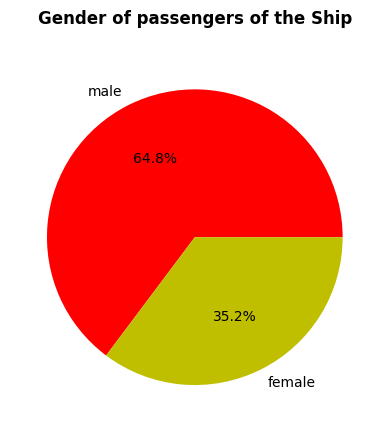

In [35]:
Sex_count = Counter(list(df['Sex']))

Sex_name = list(Sex_count.keys())
Sex_value = list(Sex_count.values())

plt.figure('Pi Chart')
plt.pie(Sex_value, labels=Sex_name,colors=['r','y'], autopct='%.1f%%' ) 
plt.title("Gender of passengers of the Ship\n", fontweight= "bold")
plt.show()


In [36]:
df.drop(['PassengerId', 'Cabin', 'Name'], inplace= True, axis=1)

In [37]:
num_col = df.select_dtypes(include='number').columns.tolist()
obj_col = df.select_dtypes(include='object').columns.to_list()
print(f'Numerical columns in the datset: {num_col}')
print()
print(f'Object columns in the dataset:{obj_col}')

Numerical columns in the datset: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Object columns in the dataset:['Sex', 'Ticket', 'Embarked']


Finding the missing values

In [43]:
missing_percentage = df.isnull().sum()*100/len(df)
missing_percentage = pd.DataFrame(missing_percentage)
missing_percentage.columns = ['missing_percentage']
missing_df = missing_percentage[missing_percentage.missing_percentage != 0].copy()
missing_df['missing_columns'] = missing_df.index
missing_df.reset_index(drop=True, inplace= True)
missing_df

,missing_percentage,missing_columns
0,19.865320,Age
1,0.224467,Embarked


In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [45]:
df.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Fare        248
Ticket      681
dtype: int64

In [ ]:
cat_col = []
for col in df.columns:
    if df[col].nunique()<=10:
        print(col, df[col].unique)
        cat_col.append(col)

column Name :Pclass
1    136
3    119
2     87
Name: Pclass, dtype: int64


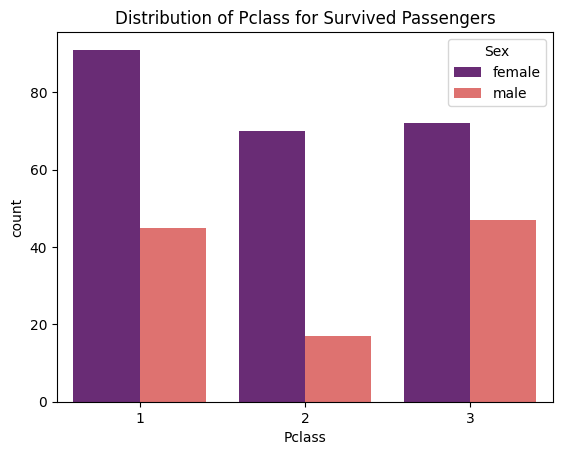

column Name :Sex
female    233
male      109
Name: Sex, dtype: int64


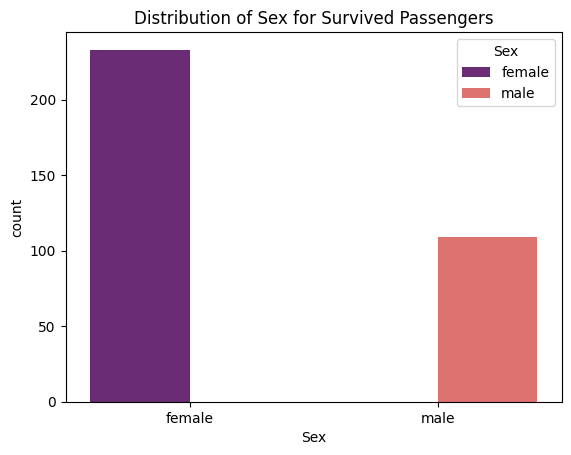

column Name :SibSp
0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64


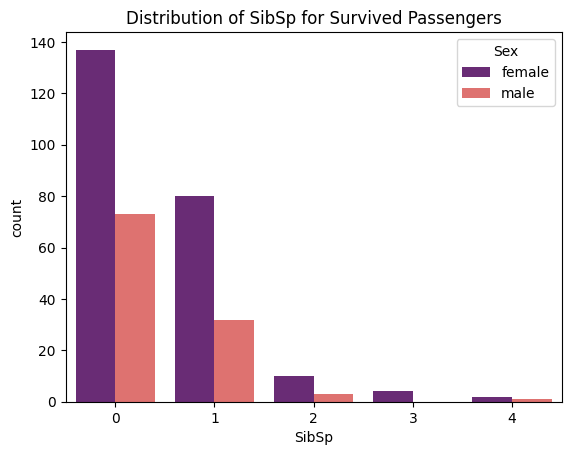

column Name :Parch
0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64


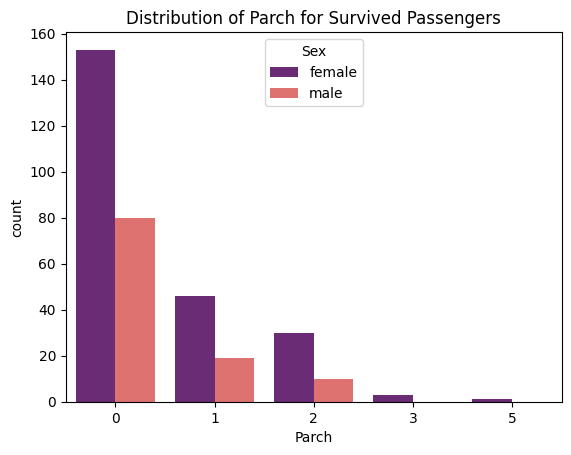

column Name :Embarked
S    217
C     93
Q     30
Name: Embarked, dtype: int64


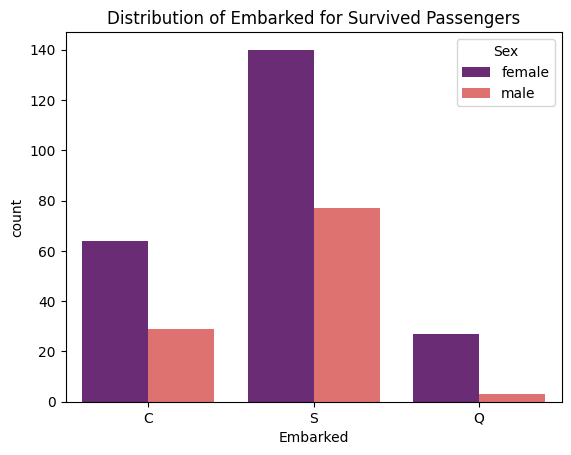

In [50]:
survive = df[df.Survived ==1]
died = df[df.Survived ==0]

for col in cat_col[1:]:
    print(f'column Name :{col}')
    print ('==='*20)
    print(survive[col].value_counts())

    sns.countplot(x=col, hue='Sex', data=survive, palette='magma')
    plt.title(f'Distribution of {col} for Survived Passengers')
    plt.show()
    print('==='*20)

In [51]:
df['Family_size']= df.Parch + df.SibSp
df.Family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

Text(0.5, 1.0, 'Distribution of family_size for Survived and died Passaengers')

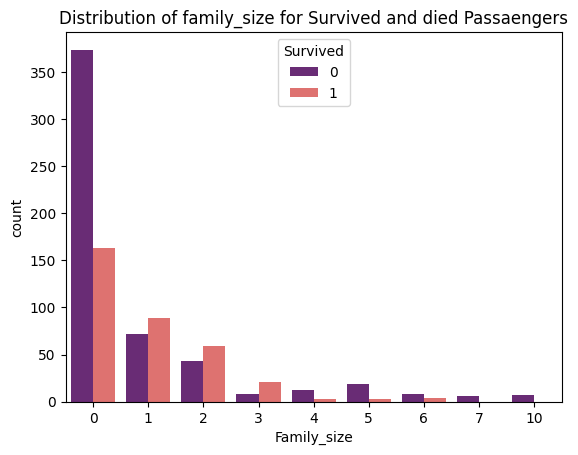

In [52]:
sns.countplot(x='Family_size', hue = 'Survived', data=df, palette='magma')
plt.title(f'Distribution of family_size for Survived and died Passaengers')

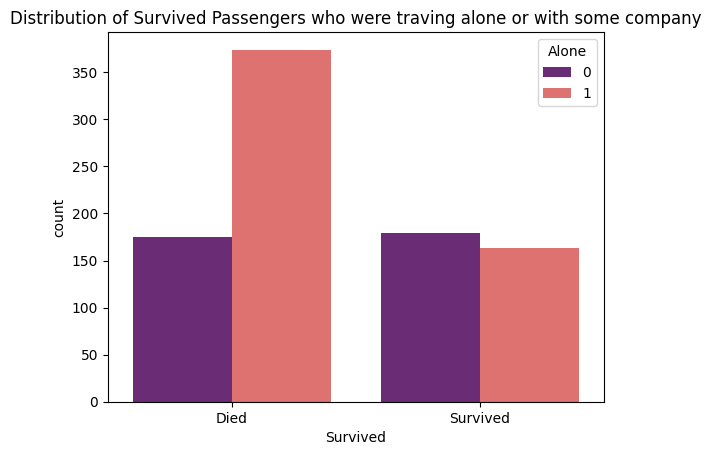

In [53]:
df['Alone'] = np.where(df['Family_size'] == 0 , 1, 0) # yes = 1, no=0
sns.countplot(x='Survived', hue='Alone', data=df, palette ='magma')
plt.title(f'Distribution of Survived Passengers who were traving alone or with some company')
plt.xticks([0, 1], ['Died', 'Survived'])
plt.show()

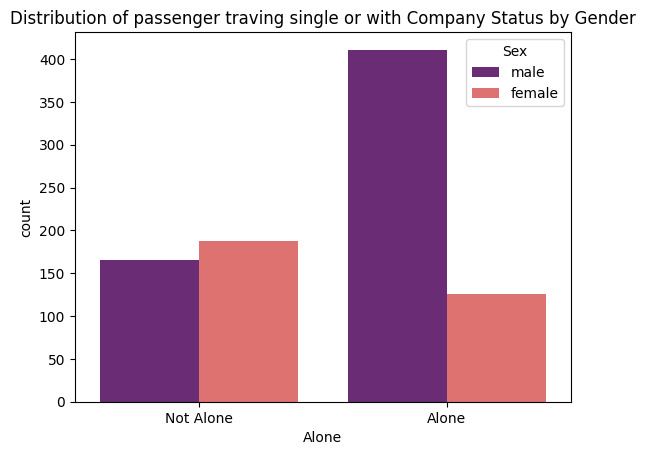

In [54]:
sns.countplot(x='Alone', hue='Sex', data=df, palette ='magma')  
plt.title('Distribution of passenger traving single or with Company Status by Gender')
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Alone
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,1,1,female,35.0,1,0,113803,53.1000,S,1,0
4,0,3,male,35.0,0,0,373450,8.0500,S,0,1


In [56]:
df = df[['Pclass','Sex','Age','Embarked','Alone','Fare','Survived']]
df

,Pclass,Sex,Age,Embarked,Alone,Fare,Survived
0,3,male,22.0,S,0,7.2500,0
1,1,female,38.0,C,0,71.2833,1
2,3,female,26.0,S,1,7.9250,1
3,1,female,35.0,S,0,53.1000,1
4,3,male,35.0,S,1,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,S,1,13.0000,0
887,1,female,19.0,S,1,30.0000,1
888,3,female,NaN,S,0,23.4500,0
889,1,male,26.0,C,1,30.0000,1


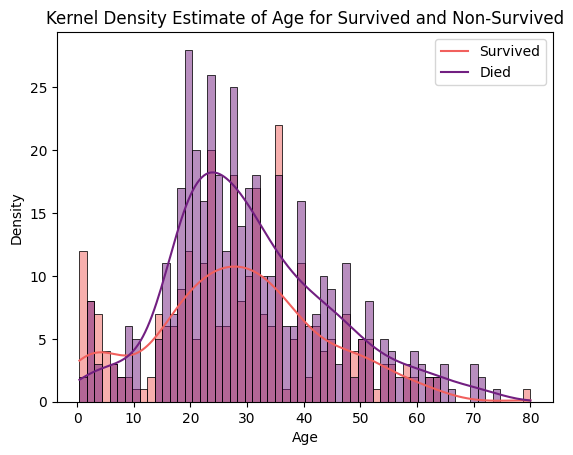

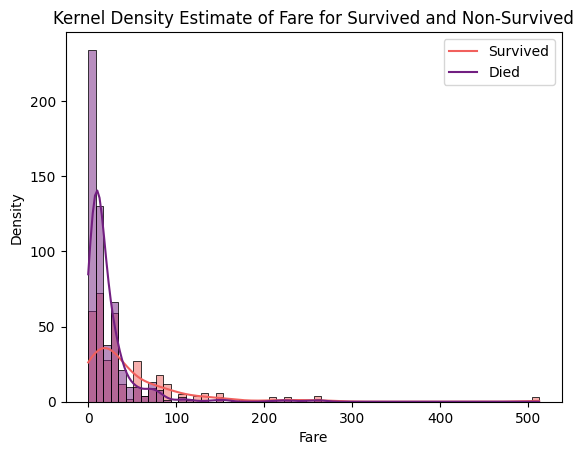

In [58]:
survive = df[df.Survived ==1]
died = df[df.Survived ==0]

for col in ['Age', 'Fare']:
    
    sns.histplot(data=df, x=col, bins=60, kde=True, palette= 'magma', edgecolor='black', hue = 'Survived',legend= True)

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimate of {col} for Survived and Non-Survived')
    plt.legend(labels=['Survived','Died'])
    plt.tight_layout
    plt.show()

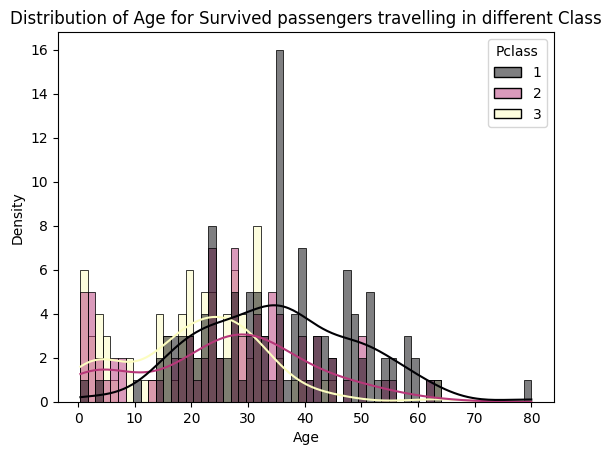

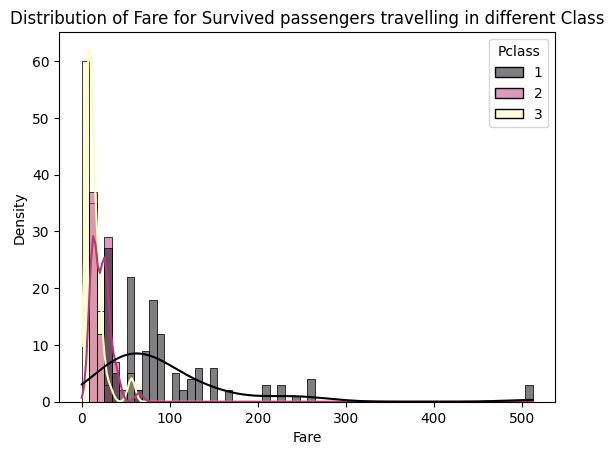

In [59]:
for col in ['Age', 'Fare']:
    
    sns.histplot(data=survive, x=col, bins=60, kde=True, palette= 'magma', edgecolor='black', hue = 'Pclass',legend= True)

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.title(f'Distribution of {col} for Survived passengers travelling in different Class')
    #plt.legend(labels=['Survived','Died'])
    plt.tight_layout
    plt.show()

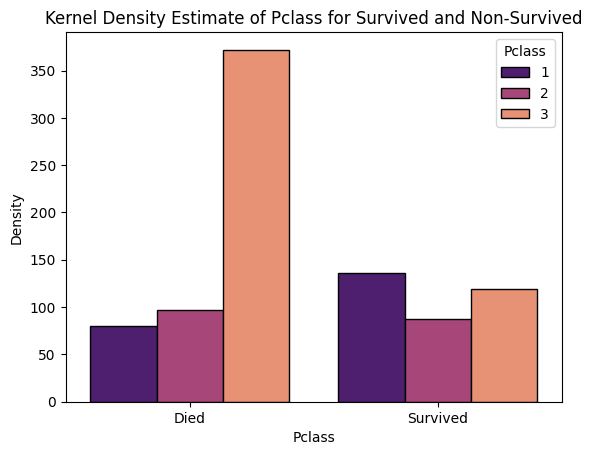

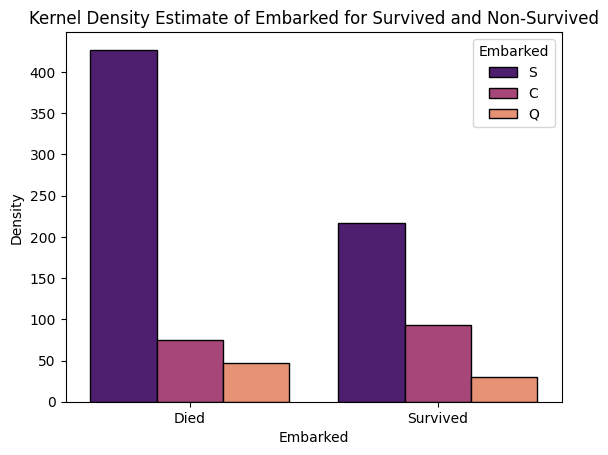

In [60]:
for col in ['Pclass', 'Embarked']:
    sns.countplot(data=df, x='Survived',  palette= 'magma', edgecolor='black', hue = col)

    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.xticks([0, 1], ['Died', 'Survived'])
    plt.title(f'Kernel Density Estimate of {col} for Survived and Non-Survived')
    #plt.legend(labels=['Survived','Died'])
    plt.tight_layout
    plt.show()

Number of dead passangers having Port of Embarkation From Southampton.
Ticket class 3
Servived passengers having Port of Embarkation From Southampton.
Ticket class 1


<AxesSubplot:xlabel='Sex', ylabel='count'>

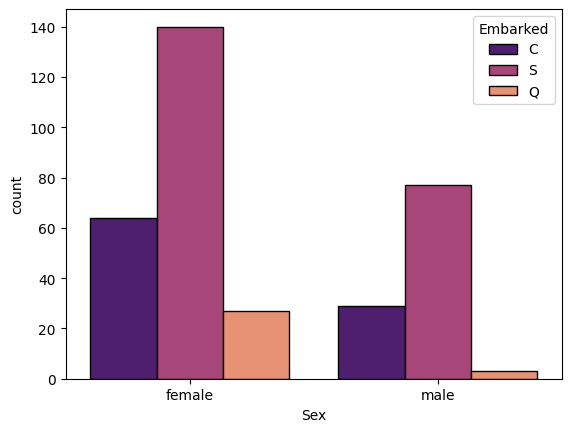

In [61]:
sns.countplot(data=survive, x='Sex',  palette= 'magma', edgecolor='black', hue = 'Embarked')


([<matplotlib.axis.XTick at 0x2827fdeaec0>,
 [Text(0, 0, 'Died'), Text(1, 0, 'Survived')])

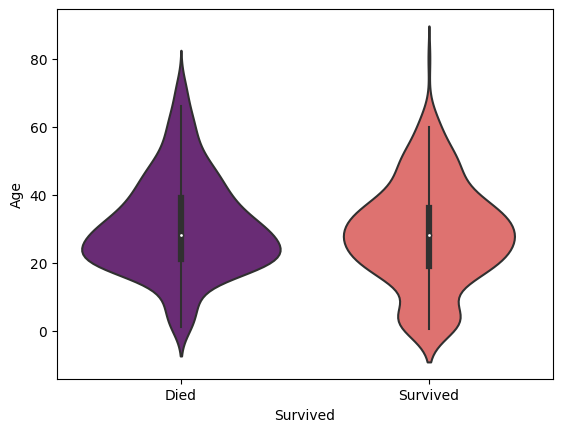

In [63]:
sns.violinplot(x='Survived', y='Age', data=df,palette='magma',)
plt.xticks([0, 1], ['Died', 'Survived'])

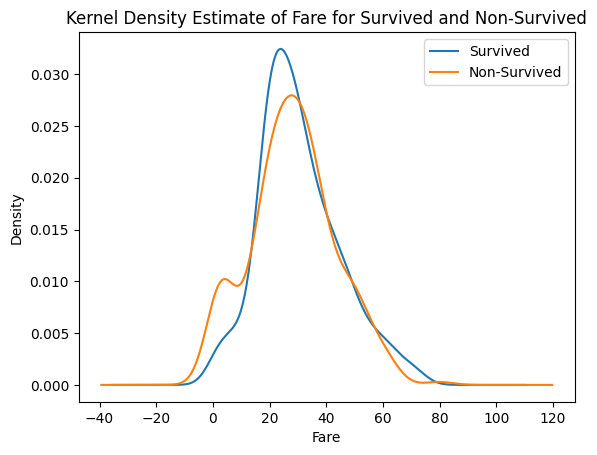

In [64]:
df[df.Survived ==0]['Age'].plot(kind='kde')
df[df.Survived ==1]['Age'].plot(kind='kde')

plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Fare for Survived and Non-Survived')
plt.legend(labels=['Survived', 'Non-Survived'])
plt.show()

Bivariate Analysis

* Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent.

*  Here we analyse the changes occured between the two variables and to what extent.

Defination:- 
* "Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference."


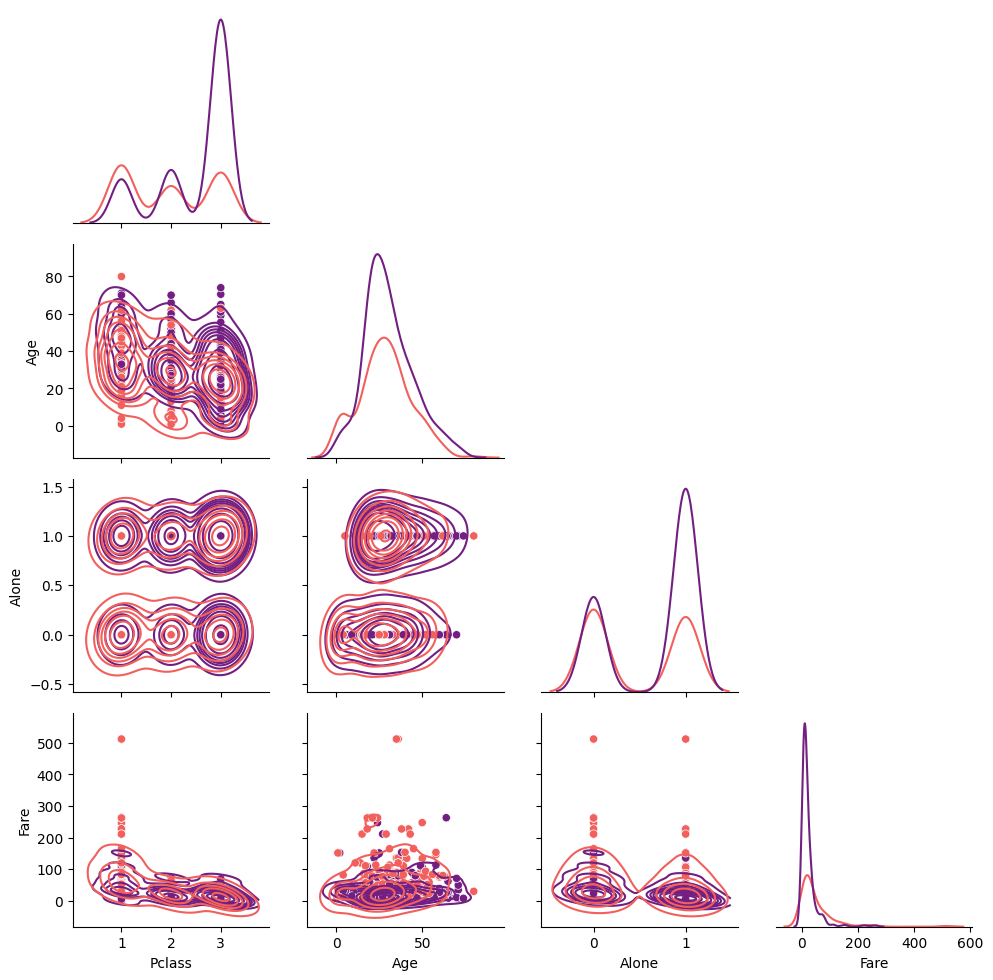

In [65]:
g = sns.PairGrid(df, hue='Survived',palette ='magma' , diag_sharey=False,corner =True)
g.map_lower(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)
plt.show()